In [20]:
import os
import pickle
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
# import tifffile as tiff

1. Load a Test Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


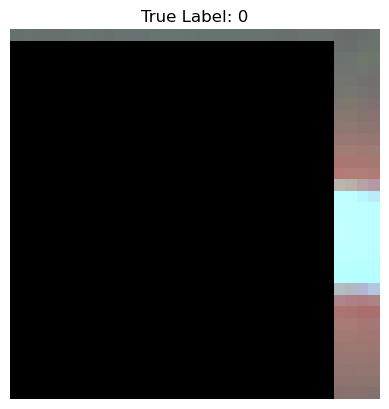

In [28]:
# Function to load a single image and label from a directory
def load_single_test_sample(directory):
    # Get the first file in the directory
    filenames = os.listdir(directory)
    first_file = filenames[0]
    
    # Load the image and label
    with open(os.path.join(directory, first_file), 'rb') as f:
        image, label = pickle.load(f)
        # Reshape the image to (height, width, bands)
        image = np.transpose(image, (1, 2, 0))
    return image, label

# Path to the test directory
test_dir = "data/classification_dataset/test"

# Load one sample
test_image, test_label = load_single_test_sample(test_dir)

# Display the loaded test image for verification
plt.imshow(test_image[:, :, :3])  # Display RGB channels (Bands 4, 3, 2)
plt.title(f"True Label: {test_label}")
plt.axis("off")
plt.show()

2. Load the Trained Model

In [22]:
# Rebuild the model architecture
model = Sequential([
    layers.Conv2D(16, 12, padding='same', activation='relu', input_shape=(32, 32, 12)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 12, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 12, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)
])

# Compile the model with the same parameters used during training
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Load weights
model.load_weights("with_classweights_10_epochs_weights.h5")
print("Model weights loaded successfully!")

Model weights loaded successfully!


3. Run Inference

In [23]:
# Preprocess the test image: expand dimensions to add batch size
test_image_preprocessed = np.expand_dims(test_image, axis=0)  # Shape: (1, 32, 32, 12)

# Run inference
predictions = model.predict(test_image_preprocessed)

# Convert logits to probabilities (optional, based on your output)
probabilities = tf.nn.softmax(predictions).numpy()

# Get the predicted label
predicted_label = np.argmax(probabilities, axis=-1)[0]

# Display the predictions
print(f"True Label: {test_label}")
print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {probabilities}")

True Label: 0
Predicted Label: 0
Prediction Probabilities: [[0.5165203  0.48347965]]


4. Display Results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


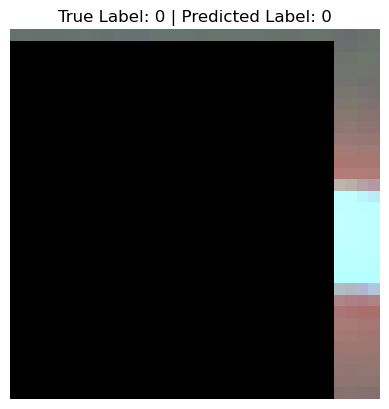

In [24]:
plt.imshow(test_image[:, :, :3])  # Display RGB channels (Bands 4, 3, 2)
plt.title(f"True Label: {test_label} | Predicted Label: {predicted_label}")
plt.axis("off")
plt.show()

5. Save the Test Image Used

In [25]:
from PIL import Image

# Convert test image to RGB format for saving
rgb_image = (test_image[:, :, [3, 2, 1]] * 255).astype(np.uint8)  # Use Bands 4, 3, 2 for RGB
image_to_save = Image.fromarray(rgb_image)
image_to_save.save("test_image_used.png")
print("Test image saved as 'test_image_used.png'")


Test image saved as 'test_image_used.png'
